# Karman-Trefftz airfoil

For the second assignment of this class, you have used the Joukowski transformation, a conformal map that shapes a cylinder into an airfoil with a cusp at the trailing edge.

Here, we are going to use another conformal map: the Karman-Trefftz transform.
This transform allows us to represent the potential flow around a class of airfoils with a non-zero tail angle at the trailing edge known as Karman-Trefftz airfoils.


**Some recommendations**:

During this exam, you will have to write functions in Python.
Remember, docstrings are cool, they document your functions and help users to understand them.

You will also create some figures.
Make sure they are generated with a publication-quality, that is, the presence of a title or caption, axis labels, and legend (when necessary).

For figures including a filled contour, we recommend the use of the 'viridis' colormap over the usual 'jet'; the last one is not perfectly perceptually-uniform.

In [245]:
# Import your libraries here.
import numpy
import math
import cmath

from matplotlib import pyplot

#embed the figures 
%matplotlib inline

---

## First part - Karman-Trefftz conformal mapping

---

### Conformal mapping

The Karman-Trefftz transformation maps a cylinder (defined in the $\xi$-plane) to an airfoil ($z$-plane) that possesses a non-zero tail angle at the trailing edge.

$$z = n \frac{\left(1 + \frac{b^2}{\xi}\right)^n + \left(1 - \frac{b^2}{\xi}\right)^n}{\left(1 + \frac{b^2}{\xi}\right)^n - \left(1 - \frac{b^2}{\xi}\right)^n}$$

where $n = 2 - \frac{\theta}{\pi}$, $\theta$ being the tail angle (in radians) at the trailing edge and $b$ a parameter that controls the thickness of the airfoil.

Note that when we choose a zero tail-angle, the Karman-Trefftz transform reduces to the Joukowski transform.

First, we need to create the conformal mapping between the $\xi$-plane of the cylinder and the $z$-plane of the airfoil.

**List of tasks:**

1- Write a function for the conformal mapping that takes the complex coordinates in the $\xi$-plane as an argument and returns the the comlpex coordinates in the $z$-plane.

To check your function, here is what we obtained:
the point $2.2 + 2.2j$ maps into the point $2.41874477821 + 1.98092269337j$ when using $b=1$ and $theta=5^o$.

In [246]:
# Write your conformal mapping function in this cell.

#Defining function
def Karman_Treff_map(zeta, b, theta):
    """
    Parameters: 
    zeta:(2D complex array): represents your original coordinate system 
    b(float): a parameter that controls your thickness of the airfoil 
    theta (float): the tail angle (IN RADIANS!) at the trailing edge
    
    Returns: 
    z (2D complex array): mapped coordinate system 
    """
    n = 2.0 - theta/math.pi 
    z = n*((1.0+(b**2)/zeta)**n+(1.0-b**2/zeta)**n)/((1.0+b**2/zeta)**n-(1.0-b**2/zeta)**n)
    return z


# testing parameters 
zeta_test = 2.2+ 1j*2.2
b_test = 1.0
theta_test = 5.0*math.pi/180
z_test = Karman_Treff_map(zeta_test,b_test,theta_test)
z_test

(2.4187447782142586+1.980922693367887j)

---

### From a cylinder  to an airfoil

Let's use our new function to map a cylinder into a Karman-Trefftz airfoil.

**List of tasks:**

1- Create a cylinder centered at $\left(x_c, y_c\right)$ with radius $R = \sqrt{\left(b-x_c\right)^2 + y_c^2}$ with $N$ points on its surface where the first and last points overlap.

Use the following parameters:
* $x_c = -0.1$, $y_c = 0.1$
* $b = 1.0$
* $\theta = 5^o$
* $N = 61$

2- Apply the Karman-Trefftz transformation using the function you previously defined to get the complex coordinates of the cambered airfoil.

3- Plot the two geometries on a figure.

4- What is the index and coordinates of the trailing-edge point?

5- What is the location of the first point on the airfoil?

1.104536101718726

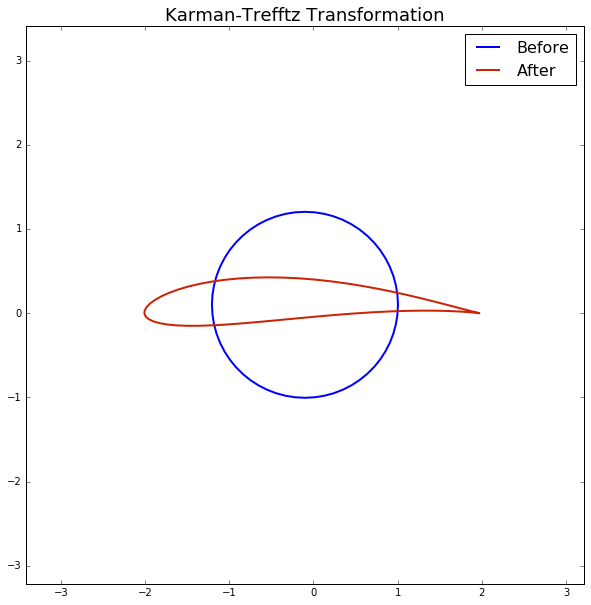

In [247]:
# Use this cell to write your code.

# Defining Parameters 
xc = -0.1
yc = 0.1 # center of the circle 
b = 1.0 
theta = 5.0*(math.pi/180)
N = 61 

# Calculating the radius and the corresponding x and y points 
theta_mesh = numpy.linspace(0, 2*math.pi, N) # angles used for plotting and making mesh
R = math.sqrt((b-xc)**2+yc**2)
zeta = R*numpy.cos(theta_mesh)+xc + 1j*(R*numpy.sin(theta_mesh)+yc) 

#2.  Transforming the surface of the cylinder busing the Karman-Trefftz transformation 
z = Karman_Treff_map(zeta, b, theta)

#3.  Plotting the two shapes on one figure
size  = 10 
pyplot.figure(figsize = (size,size))
pyplot.xlim(-3*R+xc, 3*R+xc) 
pyplot.ylim(-3*R+yc, 3*R+yc)
pyplot.title('Karman-Trefftz Transformation', fontsize = 18)
pyplot.plot(zeta.real,zeta.imag, linewidth = 2, label= 'Before', color = 'b')
pyplot.plot(z.real, z.imag, linewidth =2, label = 'After', color = '#CD2305')
pyplot.legend(fontsize =16);

R

In [248]:
# 4. What are the indices and the coordinates of the trailing edge
x_z = z.real
y_z = z.imag

#coordinates and indices 
print(numpy.where(x_z == max(x_z)))
print('x = ',x_z[59])
print('y = ', y_z[59])


(array([59]),)
x =  1.97195210972
y =  3.63504526716e-05


In [249]:
# What is the coordinates of the first point on the airfoil?
z[0]
print(' x = ', z[0].real)
print(' y = ', z[0].imag)

 x =  1.96186755678
 y =  0.00243236496677


### Mesh-grid in polar coordinates

To visualize the flow in a domain, we should probably create a mesh-grid. Let us do it in polar coordinates in the cylinder-plane ($\xi$-plane).

**List of tasks:**

1- Discretize the mesh-grid using $100$ points in the radial direction ($R\leq r \leq R+5$) and $61$ points on the surface of the cylinder (from $0$ to $2\pi$).

2- Apply the Karman-Trefftz transformation to obtain the mesh-grid in the airfoil-plane ($z$-plane). (Yes! You can use the function we created above.)

3- Plot the mesh-grid in both planes.

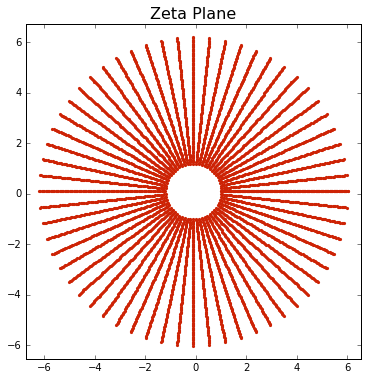

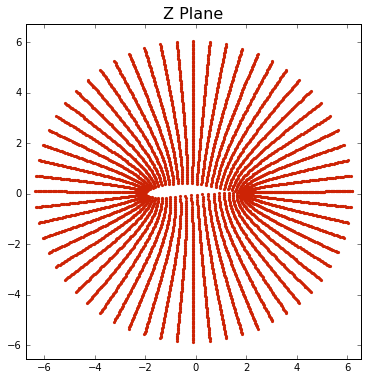

In [250]:
# Use this cell to write your code.

# Defining the range of R
N_r =100
R_mesh = numpy.linspace(R, R+5, N_r)

# Defining the meshgrid, we are goign to call the angle of the surface points  phi to avoid confusion with other theta
r , phi = numpy.meshgrid(R_mesh, theta_mesh)


# zeta mesh points 
zeta = r*numpy.cos(phi) + xc + 1j*(r*numpy.sin(phi)+yc)

# transforming mesh point 
z = Karman_Treff_map(zeta, b, theta)

#plotting the meshgrids 
size = 6
x_start = -6*R + xc 
x_end = 6*R + xc
y_start = -6*R + yc 
y_end = 6*R + yc 
pyplot.figure(figsize=(size,size))
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.title('Zeta Plane', fontsize= 16)
pyplot.scatter(zeta.real, zeta.imag, s= 10, color = '#CD2305', marker = 'o', linewidth = 0)


pyplot.figure(figsize=(size,size))
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.title('Z Plane', fontsize = 16)
pyplot.scatter(z.real,z.imag,s =10, color = '#CD2305', marker = 'o', linewidth = 0);


---

### Freestream + doublet = ?

We are now going to compute the velocity field around a cylinder in the $\xi$-plane.

As we now know, the inviscid flow around a cylinder (with no circulation) can be represented by the sum of a freestream and a doublet.

We will use a freestream with speed $U_\infty = 1$ and angle of incidence $\alpha = 0^o$.

**List of tasks:**

1- What should be the strength of the doublet to represent the flow around a cylinder of radius $R$ immersed in a freestream flow with speed $U_\infty$?

2(a)- Write a function that returns the velocity due to a freestream on a given mesh-grid.

2(b)-Write a function that returns the streamfunction due to a freestream on a given mesh-grid.

3(a)- Write a function that returns the velocity due to a point-doublet on a given mesh-grid.

3(b)- Write a function that returns the streamfunction due to a point-doublet on a given mesh-grid.

4- Using those functions, apply the principle of superposition to get the streamfunction and velocity in the cylinder-plane ($\xi$-plane).

5- Plot the streamlines using [`pyplot.contour`](http://matplotlib.org/api/pyplot_api.html?highlight=contour#matplotlib.pyplot.contour) and the velocity field using [`pyplot.quiver()`](http://matplotlib.org/api/pyplot_api.html?highlight=quiver#matplotlib.pyplot.quiver).

In [251]:
#1.  What should the strength of the doublet be to represent the flow around the cylinder of radius R 
u_inf = 1.0 

strength = 2*math.pi*u_inf*R**2
print('The strength of the doublet is ', strength)
R

The strength of the doublet is  7.665486074759095


1.104536101718726

In [252]:
# Write your functions in this cells.


#2a. write a function that returns the velocity dur to the free stream on a given meshgrid 
def get_velocity_freestream(u_inf, alpha, X, Y):
    """ 
    returns the velocity components of a freestream velocity 
    
    Parameters 
    u_inf(float)  = the magnitude of velocity 
    alpha(float) = the angle of incidence 
    X (2D numpy array): horrizontal coordinates of the meshgrid 
    Y (2D Numpy array): vertical coordinates of the meshgrid 
    
    Returns 
    U_freestream(2D numpy array): Horizontal component of the freestream velocity field
    V_freestream(2D numpy.array): Vertical componenet of the freestream velocity fiedl 
    
    """
    N_f = numpy.shape(X)
    U_freestream = u_inf*numpy.cos(alpha)*numpy.ones((N_f[0],N_f[1]),dtype='float')
    V_freestream =u_inf*numpy.sin(alpha)*numpy.ones((N_f[0],N_f[1]), dtype ='float')
    return U_freestream, V_freestream 


#2b. Write a function that returns the stream function due to a freestream on a given meshgrid
def get_stream_function_freestream(u_inf, alpha, X, Y):
    """
    Returns the stream function for a given meshgrid
    Parameters:
    u_inf(float): magnitude of the freestream velocity 
    alpha(float): angle of incidence
    X(2D numpy array): the horizontal components of the field 
    Y(2D numpy array): the verticle components of the field 
    
    Returns: 
    psi(2D numpy array): the stream function of the freestream 
    """
    
    psi = u_inf*(Y*numpy.cos(alpha)-X*numpy.sin(alpha))
    return psi



# 3a. Write a function that returns the velocity field of a point doublet 
def get_velocity_doublet(strength,xd,yd,X,Y):
    """
    returns the velocity field generated by a doublet 
    
    Parameters
    ----------
    strength(float): strength of the doublet
    xd(float): x-coordinate of the doublet
    yd(float): y-coordinate of the doublet 
    X(2D Numpy array of floats): x-coordinate mesh points 
    Y(2D Numpy array of floats): y-coordinate mesh points 
    
    Returns
    --------
    u(2D Numpy array of floats): x-component of the velocity vector field
    v(2D Numpy array of floats): y-component of the velocity vector field 
    
    """
    
    u = -strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    v = -strength/(2*math.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
    
    return u,v 

#3b. Write a function that returns the stream function for a point doublet 
def get_stream_function_doublet(strength,xd,yd,X,Y):
    """
    Returns the stream-function generated by a doublet. 
    
    Parameters
    ----------
    strength(float): strength of the doublet 
    xd(float): x-coordinate of a doublet 
    yd(float): y-coordinate of a doublet 
    X(2D Numpy array of floats): x-coordinate of the mesh points
    Y(2D Numpy array of floats): y coordinate of the mesh points 
    
    Returns 
    -------
    psi(2D Numpy array or floats): The stream function
    """
    psi = - strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    return psi

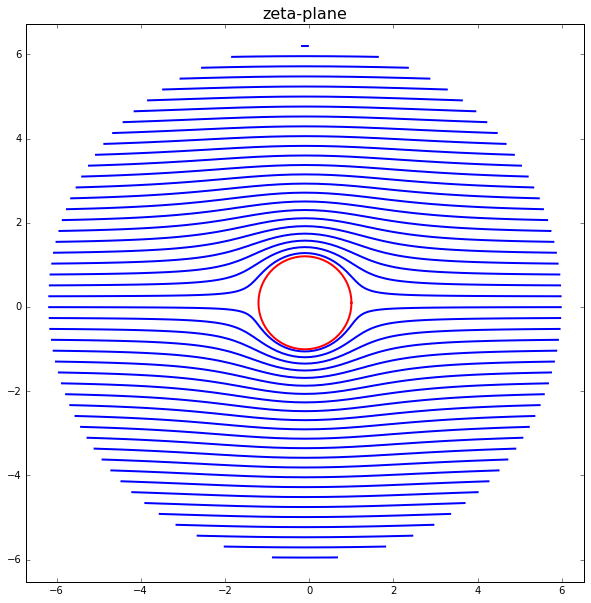

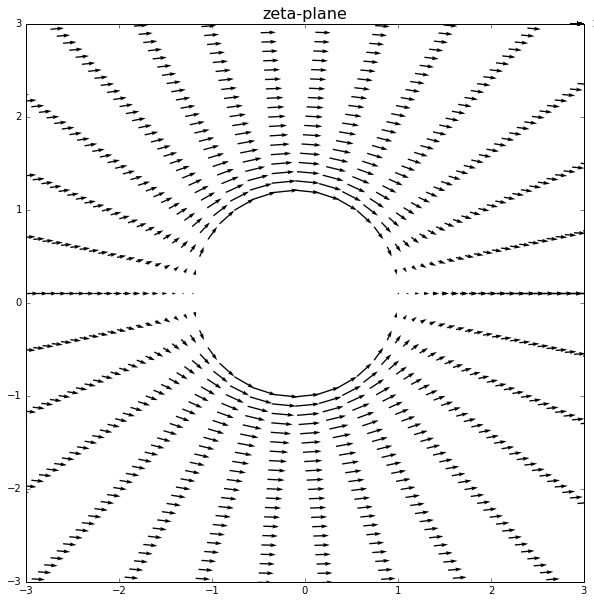

In [253]:
# Use this cell to provide the rest of the code.
alpha = 0.0 
u_inf = 1.0
x_doublet,y_doublet = xc, yc


# Velocity and Stream function of a freestream 
u_freestream_zeta, v_freestream_zeta = get_velocity_freestream(u_inf, alpha, zeta.real, zeta.imag)
psi_freestream_zeta = get_stream_function_freestream(u_inf, alpha, zeta.real, zeta.imag)

# Velocity and Stream function of a doublet 
u_doublet_zeta, v_doublet_zeta = get_velocity_doublet(strength, x_doublet, y_doublet, zeta.real, zeta.imag)
psi_doublet_zeta = get_stream_function_doublet(strength, x_doublet, y_doublet, zeta.real, zeta.imag)

# calculating superposition
u_zeta = u_freestream_zeta + u_doublet_zeta
v_zeta = v_freestream_zeta + v_doublet_zeta
psi_zeta = psi_freestream_zeta + psi_doublet_zeta

# plotting thes stream function 
size = 10 
pyplot.figure(figsize =(size,size))
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start,y_end)
pyplot.title('zeta-plane', fontsize=16)
pyplot.contour(zeta.real, zeta.imag, psi_zeta, 50, colors='b', linewidths=2, linestyles='solid', arrowstyle='->');
pyplot.plot(zeta[:,0].real, zeta[:,0].imag, linewidth =2, color='r', linestyle ='-') 

# plotting the velocity 
size = 10
pyplot.figure(figsize =(size,size))
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.title('zeta-plane', fontsize =16)
Q = pyplot.quiver(zeta.real[::2, ::2], zeta.imag[::2, ::2], u_zeta[::2, ::2], v_zeta[::2, ::2],
               pivot='mid', scale_units='xy', scale=7)
qk = pyplot.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')

---

### Freestream + doublet... Is that enough?

Let's use the theory of conformal mapping to obtain the velocity field around the airfoil in the $z$-plane

We remember that the complex velocity in the $z$-plane is related to the complex one in the $\xi$-plane via the following formula:

$$W_z = W_\xi / \frac{dz}{d\xi}$$

where $W_z = u_z - i v_z$ and $W_\xi = u_\xi - iv_\xi$.

The derivative of $z$ with respect to $\xi$ is:

$$\frac{dz}{d\xi} = \frac{4n^2b^2}{\xi^2 - b^4} \frac{\left(1 + \frac{b^2}{\xi}\right)^n \left(1 - \frac{b^2}{\xi}\right)^n}{\left[\left(1 + \frac{b^2}{\xi}\right)^n - \left(1 - \frac{b^2}{\xi}\right)^n\right]^2}$$

**List of tasks:**

1- Write a function that takes the complex coordinates in the $\xi$-plane as argument and returns the value of the derivative $\frac{dz}{d\xi}$.

To check your function, here is what we obtained:
the function on the point $2.2 + 2.2j$ returns the point $1.00022655827 + 0.0995002428218j$ when using $b=1$ and $theta=5^o$.

2- Compute the velocity on the mesh-grid in the airfoil plane ($z-plane$).

3- Plot the streamlines and the velocity field in the $z$-plane using the Matplotlib functions [`pyplot.contour()`](http://matplotlib.org/api/pyplot_api.html?highlight=contour#matplotlib.pyplot.contour) and [`pyplot.quiver()`](http://matplotlib.org/api/pyplot_api.html?highlight=quiver#matplotlib.pyplot.quiver), respectively.

4- Does the streamlines at the trailing-edge look physical? Why?
(You can display a zoom at the trailing-edge to support your answer.)

In [254]:
# 1. Use this cell to write your function.
def get_KF_deriv(zeta, b, theta):
    """
    returns the derivative of the KF transformation 
    Parameters: 
    zeta:(2D complex array): represents your original coordinate system 
    b(float): a parameter that controls your thickness of the airfoil 
    theta (float): the tail angle (IN RADIANS!) at the trailing edge
    
    Returns: 
    dzdzeta (2D complex array): the derivative 
    """
    n = 2.0 - theta/math.pi
    dzdzeta = (4*n**2*b**2*(1+b**2/zeta)**n*(1-b**2/zeta)**n)/((zeta**2-b**4)*((1+b**2/zeta)**n-(1-b**2/zeta)**n)**2)
    return dzdzeta

# testing 
dzdzeta_test = get_KF_deriv(zeta_test, b, theta)
dzdzeta_test

(1.0002265582728562+0.0995002428218433j)

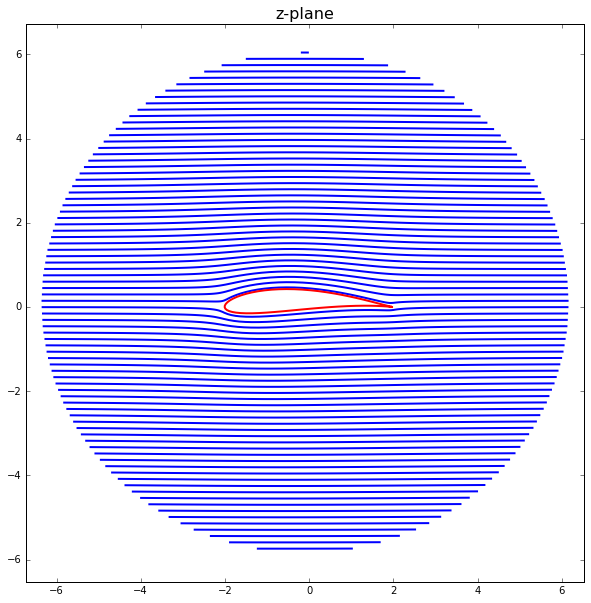

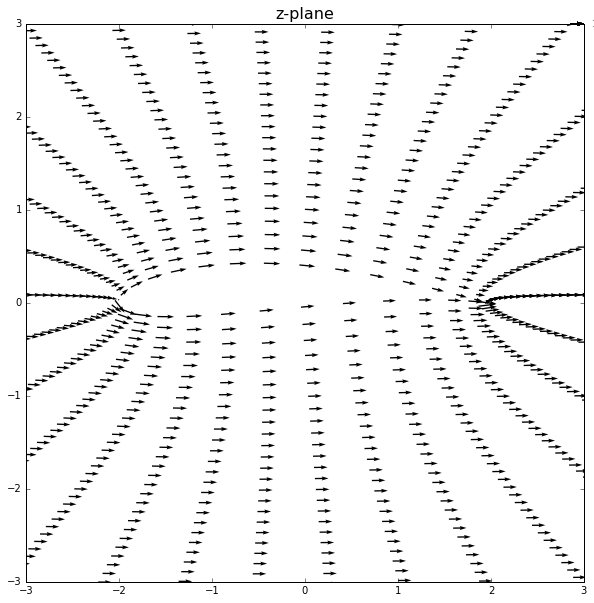

In [255]:
# Use this cell to provide the rest of the code.

#2. Compute the velocity on the mesh grid 
dzdzeta = get_KF_deriv(zeta, b, theta)

W_zeta = u_zeta - 1j*v_zeta
W_z = W_zeta/dzdzeta
U_z = W_z.real
V_z = -W_z.imag

# Plotting the streamfunction
size = 10 
pyplot.figure(figsize =(size,size))
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start,y_end)
pyplot.title('z-plane', fontsize=16)
pyplot.contour(z.real, z.imag, psi_zeta, 100, colors='b', linewidths=2, linestyles='solid', arrowstyle='->');
pyplot.plot(z[:,0].real, z[:,0].imag, linewidth =2, color='r', linestyle ='-');


# plotting the velocity 
size = 10
pyplot.figure(figsize =(size,size))
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.title('z-plane', fontsize =16)
Q = pyplot.quiver(z.real[::2, ::2], z.imag[::2, ::2], U_z[::2, ::2], V_z[::2, ::2],
               pivot='mid', scale_units='xy', scale=7)
qk = pyplot.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')


---

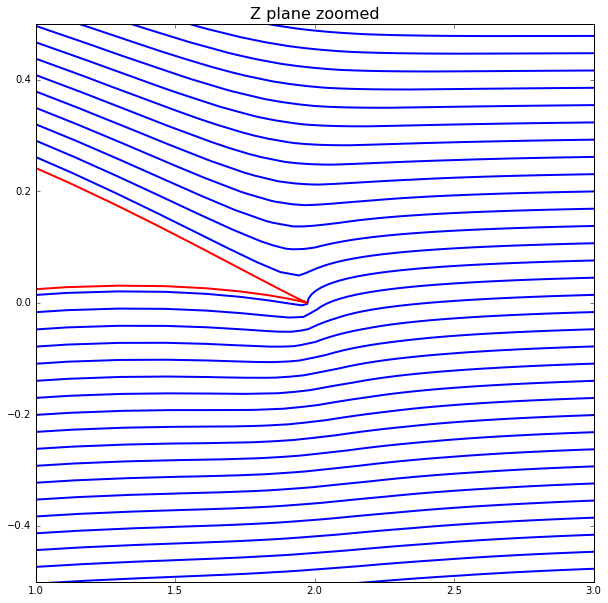

In [256]:
#4. Do the stream lines at the trailing edge of the airfoil look physical? 
# Plotting the streamfunction
size = 10 
pyplot.figure(figsize =(size,size))
pyplot.xlim(1, 3)
pyplot.ylim(-0.5,0.5)
pyplot.title('Z plane zoomed', fontsize=16)
pyplot.contour(z.real, z.imag, psi_zeta, 400, colors='b', linewidths=2, linestyles='solid', arrowstyle='->');
pyplot.plot(z[:,0].real, z[:,0].imag, linewidth =2, color='r', linestyle ='-');

These stream lines do not look physical, it seems there is a discontinuity at the trailing edge due to the sharp point

### Pressure coefficient

Let's have a look at the pressure coefficient to check what's going on.

**List of tasks:**

1- Compute the pressure coefficient and plot its filled contour in both planes using the Matplotlib function [`pyplot.contourf()`](http://matplotlib.org/api/pyplot_api.html?highlight=contourf#matplotlib.pyplot.contourf).

2- What is the minimum value of the pressure coefficient on the surface of the airfoil?

3- What are the index of the stagnation points?

4- The angle of incidence of the freestream is zero, so why is the stagnation point not at the trailing edge?

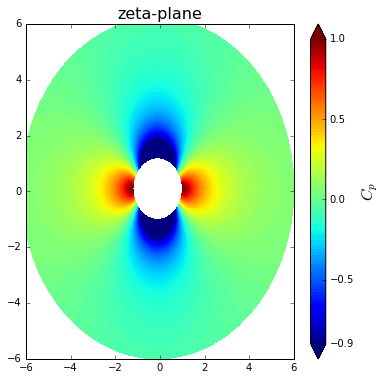

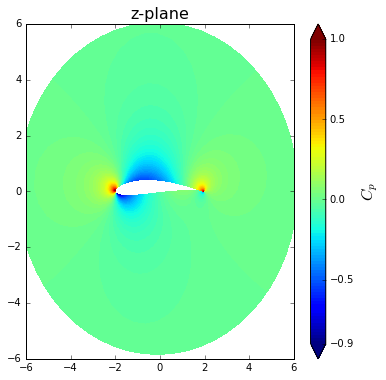

In [257]:
# Use this cell to write your code.

#1. Compute the pressure coefficient and plot its filled contour in both planes 

# Computing the pressure coefficient 
# Calculating the pressure coefficient in the z plane 
Cp_zeta = 1.0 - (u_zeta**2+ v_zeta**2)/u_inf**2
Cp_z = 1.0 - ((U_z**2+V_z**2)/u_inf**2)

# plot the pressure coefficient field on the zeta plane
size=6 
pyplot.figure(figsize=(size, size))
pyplot.xlim(-6,6)
pyplot.ylim(-6,6) 
pyplot.title('zeta-plane', fontsize = 16)
contf = pyplot.contourf(zeta.real,zeta.imag,Cp_zeta,levels=numpy.linspace(-0.9, 1.0, 100), extend='both') 
cbar= pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.9,-0.5,0.0, 0.5, 1.0]);

# plot the pressure coefficient field on the z plane
size=6 
pyplot.figure(figsize=(size, size))
pyplot.xlim(-6,6)
pyplot.ylim(-6,6) 
pyplot.title('z-plane', fontsize = 16)
contf = pyplot.contourf(z.real,z.imag,Cp_z,levels=numpy.linspace(-0.9, 1.0, 100), extend='both') 
cbar= pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.9,-0.5,0.0, 0.5, 1.0]);

In [258]:
# 2. What is the minimum pressure coefficent on the airfoil surface 
numpy.where(Cp_z == numpy.min(Cp_z))
Cp_z[59,0]

-35.431386241975716

In [259]:
#3. where are the stagnation point
numpy.where(Cp_z==1.0)

(array([ 0, 30, 60]), array([0, 0, 0]))

In [260]:
print('x = ', z[0,0].real,'y = ',z[0,0].imag)
print('x = ', z[30,0].real,'y = ',z[30,0].imag)

x =  1.96186755678 y =  0.00243236496677
x =  -2.00311129228 y =  0.0328200401337


 **4. Why are the stagnation points not at the trailing edge?**
 The trailing edge is angled down and the first point on the circle is does not correspond to the trailing edge. Instead the trailing edge corresponds to a later point when indexing from the theta = 0 and going counter clockwise 
 

---

### Kutta condition!

We need to satisfy the [Kutta condition](http://en.wikipedia.org/wiki/Kutta_condition),
>"A body with a sharp trailing edge which is moving through a fluid will create about itself a circulation of sufficient strength to hold the rear stagnation point at the trailing edge."

**List of tasks:**

1- Calculate the circulation needed to satisfy the Kutta condition (i.e. to bring the stagnation point to the trailing-edge).

2(a)- Write a function that returns the velocity field due to a vortex-point on a given mesh-grid.

2(b)- Write a function that returns the streamfunction due to a vortex-point on a given mesh-grid.

3- Apply the principle of superposition to take into account the effect of the vortex.

4- Compute and plot the streamlines and velocity field in both planes.

5- Compute and plot filled contour of pressure coefficient in both planes.

6- What are the index of the stagnation points? Is it what you were expecting?

In [261]:
#1. Calculate the circulation needed t o satify the Kutta condition (ie bring the stagnation point to the trailing edge)

# what is the angle the trailing edge currently is? 
v_zeta[59,0]

0.20791169081776098

In [262]:
gamma = 2*math.pi*(zeta[59,0].real**2+ zeta[59,0].imag**2)*v_zeta[59,0]/zeta[59,0].real
gamma

1.3046815272564196

In [263]:
# Use this cell to write your functions.

#2a. Write a function that returns the velocity field due to vortex point on a given mesh-grid 
def get_velocity_vortex(strength, xv, yv, X, Y):
    """
    Returns the velocity field generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = + strength/(2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = - strength/(2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    return u, v

# 2b. Write a function that gives a stream function due to a point vortex 
def get_stream_function_vortex(strength, xv, yv, X, Y):
    """
    Returns the stream-function generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength/(4*math.pi)*numpy.log((X-xv)**2+(Y-yv)**2)
    
    return psi

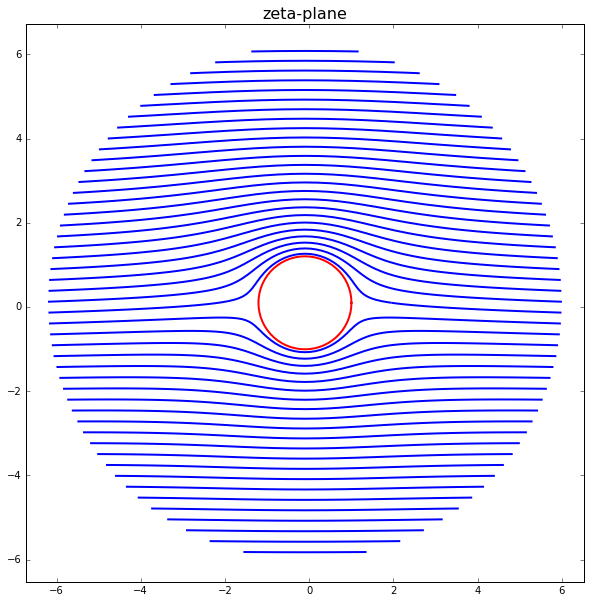

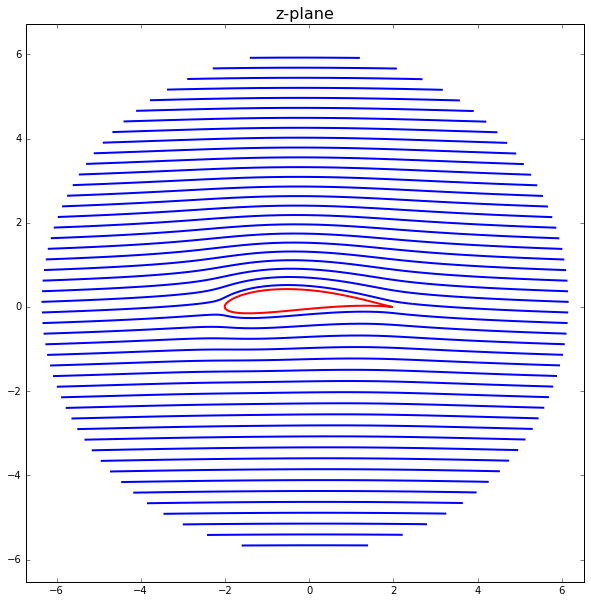

In [264]:
# Use this cell to provide the rest of the code.

#3. apply superposition 
xv, yv = xc, yc 
u_vortex_zeta, v_vortex_zeta = get_velocity_vortex(gamma, xv, yv, zeta.real, zeta.imag)
psi_vortex_zeta = get_stream_function_vortex(gamma, xv, yv, zeta.real, zeta.imag) 

# add them together 
u_zeta = u_freestream_zeta + u_doublet_zeta + u_vortex_zeta
v_zeta = v_freestream_zeta + v_doublet_zeta + v_vortex_zeta 
psi_zeta = psi_freestream_zeta + psi_doublet_zeta + psi_vortex_zeta 


# computing in the other plane (psi remains the same)
W_zeta = u_zeta - 1j*v_zeta 
W_z = W_zeta/dzdzeta
U_z = W_z.real
V_z = -W_z.imag

#Plotting the stream functions 
size = 10 
pyplot.figure(figsize =(size,size))
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start,y_end)
pyplot.title('zeta-plane', fontsize=16)
pyplot.contour(zeta.real, zeta.imag, psi_zeta, 50, colors='b', linewidths=2, linestyles='solid', arrowstyle='->');
pyplot.plot(zeta[:,0].real, zeta[:,0].imag, linewidth =2, color='r', linestyle ='-') 


size = 10 
pyplot.figure(figsize =(size,size))
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start,y_end)
pyplot.title('z-plane', fontsize=16)
pyplot.contour(z.real, z.imag, psi_zeta, 50, colors='b', linewidths=2, linestyles='solid', arrowstyle='->');
pyplot.plot(z[:,0].real, z[:,0].imag, linewidth =2, color='r', linestyle ='-');



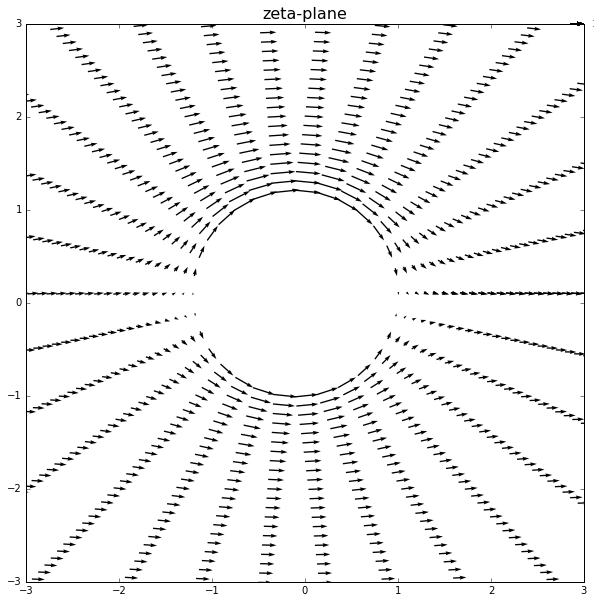

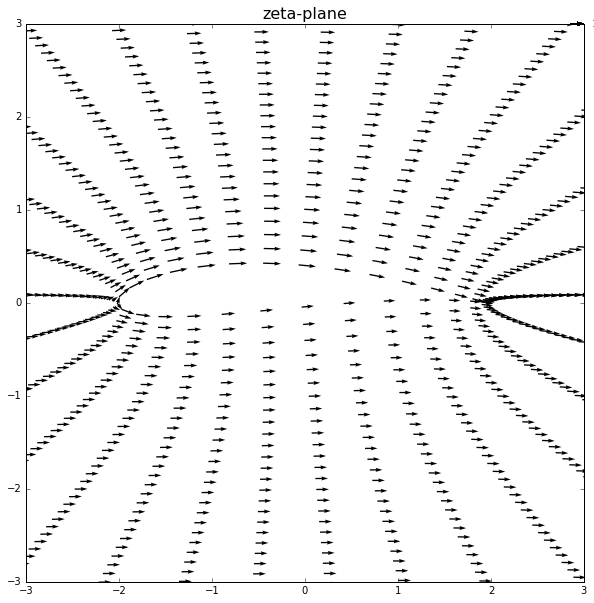

In [230]:
# plotting the velocity 
size = 10
pyplot.figure(figsize =(size,size))
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.title('zeta-plane', fontsize =16)
Q = pyplot.quiver(zeta.real[::2, ::2], zeta.imag[::2, ::2], u_zeta[::2, ::2], v_zeta[::2, ::2],
               pivot='mid', scale_units='xy', scale=7)
qk = pyplot.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')

size = 10
pyplot.figure(figsize =(size,size))
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.title('zeta-plane', fontsize =16)
Q = pyplot.quiver(z.real[::2, ::2], z.imag[::2, ::2], U_z[::2, ::2], V_z[::2, ::2],
               pivot='mid', scale_units='xy', scale=7)
qk = pyplot.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')

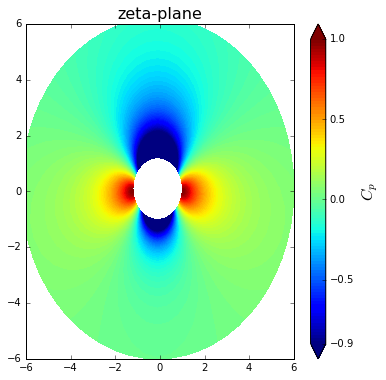

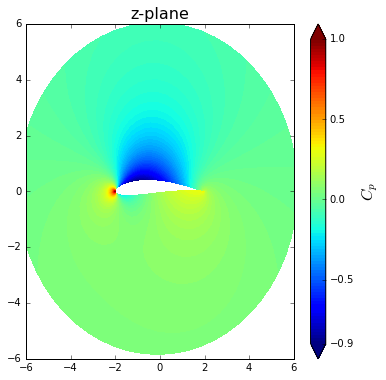

In [231]:
# Computing the pressure coefficient 
# Calculating the pressure coefficient in the z plane 
Cp_zeta = 1.0 - (u_zeta**2+ v_zeta**2)/u_inf**2
Cp_z = 1.0 - ((U_z**2+V_z**2)/u_inf**2)

# plot the pressure coefficient field on the zeta plane
size=6 
pyplot.figure(figsize=(size, size))
pyplot.xlim(-6,6)
pyplot.ylim(-6,6) 
pyplot.title('zeta-plane', fontsize = 16)
contf = pyplot.contourf(zeta.real,zeta.imag,Cp_zeta,levels=numpy.linspace(-0.9, 1.0, 100), extend='both') 
cbar= pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.9,-0.5,0.0, 0.5, 1.0]);

# plot the pressure coefficient field on the z plane
size=6 
pyplot.figure(figsize=(size, size))
pyplot.xlim(-6,6)
pyplot.ylim(-6,6) 
pyplot.title('z-plane', fontsize = 16)
contf = pyplot.contourf(z.real,z.imag,Cp_z,levels=numpy.linspace(-0.9, 1.0, 100), extend='both') 
cbar= pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.9,-0.5,0.0, 0.5, 1.0]);


In [273]:
Cp_zeta[0,0]
u_zeta[0,0]
numpy.min(abs(v_zeta))

5.7933316411301101e-18

---

### What about the lift and drag?

The drag is defined as the force felt by the body in the direction of the freestream and the lift as the one normal to the freestream direction.

**List of tasks:**

1- Assuming a density $\rho=1$ and a farfield pressure $p_\infty=0$, calculate the lift in two manners:
* using the Kutta-Joukowski theorem,
* integrating the pressure along the surface of the cylinder.

2- Calculate the drag by integrating the pressure along the surface of the cylinder. What's the value? Is it what you were expecting? Why?

In [233]:
# Use this cell to provide the code.

# 1.

# Kutta-Joukowski Theorum
Lift_KJ = 1.0*gamma*u_inf

#integrating the pressure along the surface of the cylinder 
delta_theta = theta_mesh[1]-theta_mesh[0]
P = numpy.zeros((N))
for i in range(N):
    P[i] = 0.5*u_inf**2*Cp_zeta[i,0]*numpy.sin(theta_mesh[i])*R*delta_theta
    
Lift_calc = -numpy.sum(P)

print('KJ says the Lift will be ', Lift_KJ)
print('Calculating gave us ', Lift_calc)

KJ says the Lift will be  1.30436900494
Calculating gave us  1.30436900494


In [234]:
# 2. calculate the drag
for i in range(N):
    P[i] = 0.5*u_inf**2*Cp_zeta[i,0]*numpy.cos(theta_mesh[i])*R*delta_theta
    
Drag_calc = -numpy.sum(P)
print('For Drag we get ', Drag_calc)

For Drag we get  -0.0557904148232


---

## Second part - Sources and vortices

---

In the first part of the exam, we have used a conformal mapping and the complex-variable theory to model the flow around an airfoil.

Here, we are going to provide you a set of points which represent the previously used Karman-Trefftz airfoil, as well as the source-strength and vortex-strength associated with each point.

Your task will be to load those data from a file, compute the velocity field generated by those singularities, and apply the principle of superposition.

We are going to use the same freestream conditions: speed $U_\infty = 1$ with angle of incidence $\alpha = 0^o$.

The file `airfoil_data_midterm.txt` contains $N$ lines (where $N$ is the number of points used to discretize the airfoil) and 4 columns (x-coordinates, y-coordinates, source-strenghts, and vortex-strengths).

You are problably wondering how we obtained those source-strenghts and vortex-strengths.
Well, they are the solution from a source-vortex panel method that we are going to program during the second part of the semester.

**List of tasks:**

1- Read the data from the file `airfoil_data_midterm.txt` using the Numpy function [`numpy.loadtxt()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html). (You might want to set the keyword argument `unpack` to `True`.)

2- Create a $201 \times 201$ Cartesian mesh-grid that covers the domain $[-2.5, 2.5]\times[-2.5, 2.5]$.

3- Write a function to compute the velocity field due a source-point.

4- Compute the velocity field generated by the freestream, the source-points, and the vortex-points and plot the streamlines using the Matplotlib function [`pyplot.streamplot()`](http://matplotlib.org/api/pyplot_api.html?highlight=streamplot#matplotlib.pyplot.streamplot).

5- Compute the pressure coefficient on the mesh-grid and plot its filled contour. What are the coordinates of the maximum pressure coefficient?

6- Calculate the lift using the Kutta-Joukowski theorem. (Hint: the total circulation corresponds to the sum of all vortex strengths.)

In [235]:
# Write your function in this cell.

# 3. Velocity due to a source 
def get_velocity(strength, xs,ys,X,Y):
    """returns the velocity field generated by a source and sink
    strength: strength of source/sink (float)
    xs : x-coordinate of the source/sink
    ys : y-coordinate of the source/sink 
    X : 2D mesh of x coordinates 
    Y : 2D mesh of y coordinates
    
    you will get u and v 
    u : 2D x components of the velocity vector field 
    v : 2D y-components of the velocity vector field 
    """
    u = strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    
    return u,v


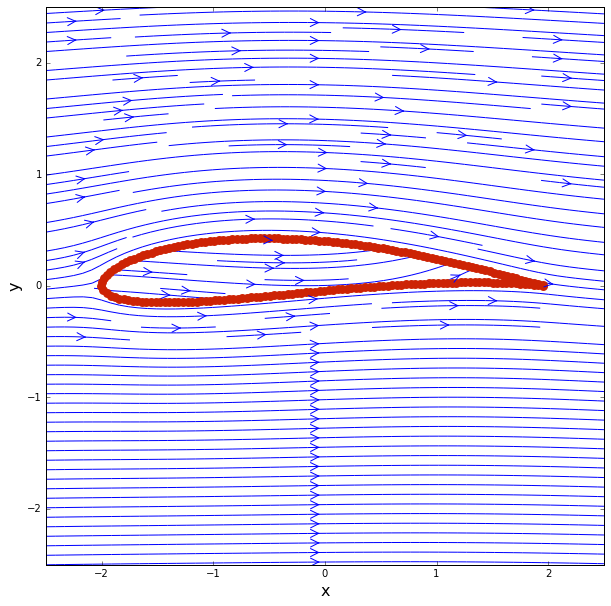

In [236]:
# Use this cell to provide the rest of the code.

#1. Loading the data 
x_source, y_source, strength, gamma = numpy.loadtxt('airfoil_data_midterm.txt', unpack ='True')
length = numpy.size(strength)

#2.  Defining the meshgrid 
N = 201
x_start, x_end = -2.5, 2.5
y_start, y_end = -2.5, 2.5 

x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)

X, Y = numpy.meshgrid(x,y)

# computing the velocity field 
u_inf  = 1.0 
alpha = 0 

u_freestream, v_freestream = get_velocity_freestream(u_inf, alpha, X, Y)

u_summed = numpy.zeros((N,N), dtype = 'float')
v_summed = numpy.zeros((N,N), dtype = 'float')

# applying the superposition theory 
for i in range(length):
    u_source, v_source = get_velocity(strength[i], x_source[i], y_source[i], X, Y)
    u_vortex, v_vortex = get_velocity_vortex(gamma[i], x_source[i], y_source[i], X, Y)
    u_summed = u_summed + u_source + u_vortex
    v_summed = v_summed + v_source + v_vortex 

u = u_summed + u_freestream 
v = v_summed + v_freestream 


# plot the streamlines
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=2, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o', linewidth=0);

(100, 19)


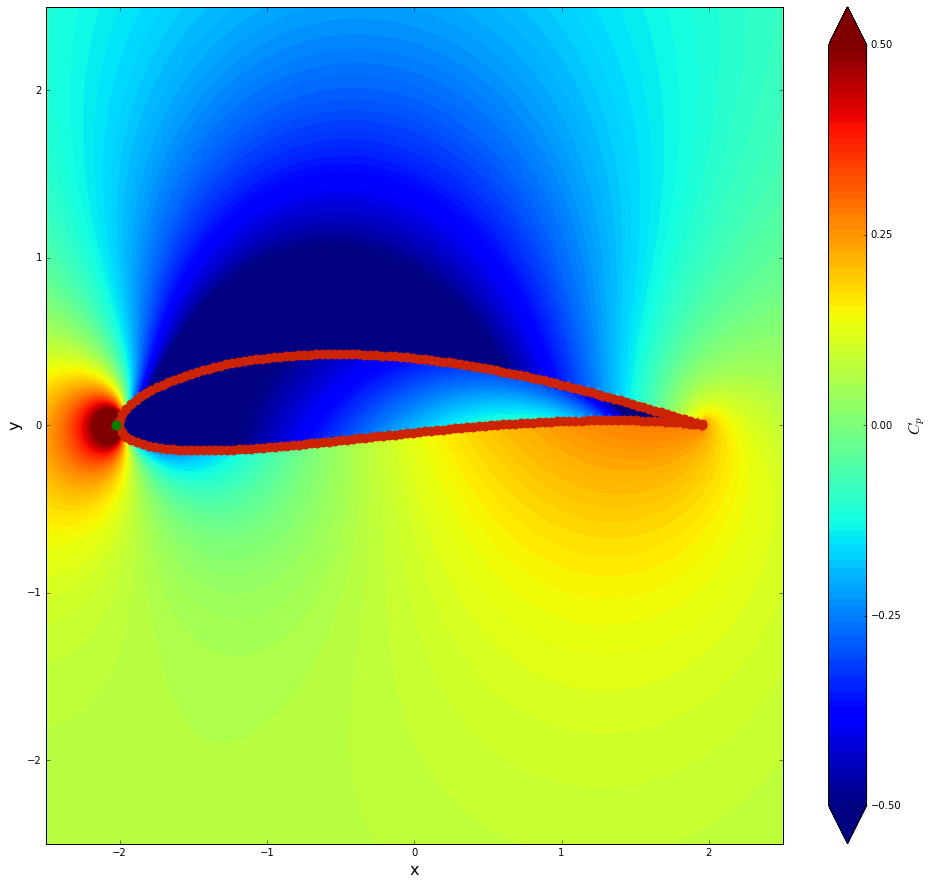

In [237]:
# Computing the pressure coefficient 
Cp = 1.0 - (u**2+v**2)/(u_inf**2)
cpmax = numpy.unravel_index(Cp.argmax(),Cp.shape)
print(cpmax)

## plotting the pressure coefficient field
size = 15
pyplot.figure(figsize=(1.1*size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, Cp, levels=numpy.linspace(-0.5, 0.50, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.5, -0.25, 0.0, 0.25, 0.5])
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o');
pyplot.scatter(X[cpmax], Y[cpmax], color = 'g', s = 80, marker = 'o');

In [238]:
# Calculating the Lift 
Lift = 1.0*numpy.sum(gamma)*u_inf
Lift

1.2376800000000001

In [239]:
Cp[cpmax]

0.95707324723403797

In [240]:
X[cpmax]

-2.0249999999999999

In [241]:
Y[cpmax]

0.0